In [0]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
df = pd.read_csv('avocado.csv', index_col = 'Date', parse_dates = True)
df = df.drop('Unnamed: 0', axis = 1)
df = df.sort_values(by='Date')

In [0]:
df_con = df[df['type'] == 'conventional']
df_con = df_con[df_con['region'] == 'TotalUS']
df_con = df_con[['AveragePrice']]
df_con = df_con.reset_index()
df_con.columns = ['ds', 'y']

In [4]:
model = Prophet(yearly_seasonality = True)
model.fit(df_con)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)

In [8]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.116037,0.985165,1.234971
530,2019-03-22,1.117355,0.979151,1.245909
531,2019-03-23,1.119147,0.986986,1.240110
532,2019-03-24,1.121399,0.986460,1.254684
533,2019-03-25,1.124078,0.985585,1.256949


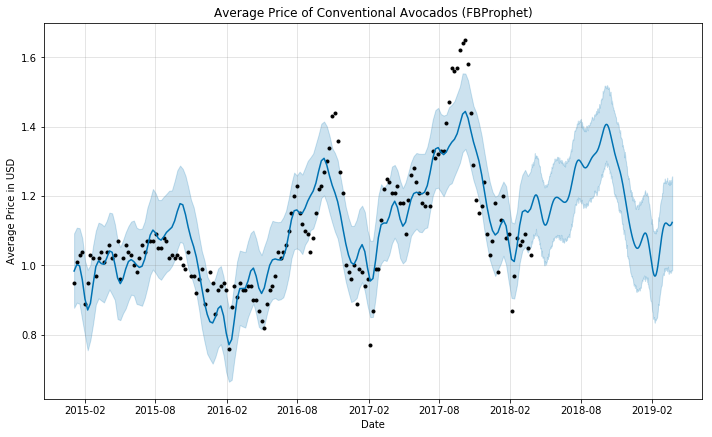

In [9]:
fig1 = model.plot(forecast, xlabel = 'Date', ylabel = 'Average Price in USD')
plt.title('Average Price of Conventional Avocados (FBProphet)');

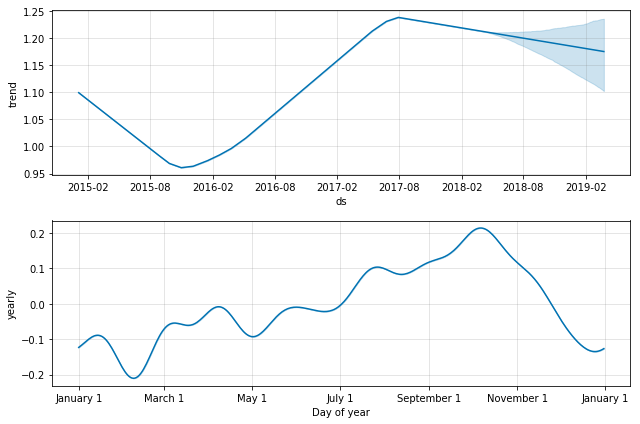

In [10]:
fig2 = model.plot_components(forecast)